In [1]:
from fredapi import Fred
import yfinance as yf
import pandas_datareader.data as web

import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import linregress
from itertools import product

# from openbb import obb

from scipy.optimize import minimize_scalar
from scipy.integrate import quad
from scipy.stats import norm

In [2]:
## commodity prices ##
commodities = pd.read_csv('../Data/raw/commodity_prices.csv',index_col=['Date'])
commodities.index = pd.to_datetime(commodities.index)

## stock prices ##
stocks = pd.read_csv('../Data/raw/stock_prices.csv',index_col=['Date'])
stocks.index = pd.to_datetime(stocks.index)

## effr ##
effr = pd.read_csv('../Data/raw/effective_federal_funds_rate.csv',index_col=['Date'])
effr.index = pd.to_datetime(effr.index)

## dollar index ##
dxy = pd.read_csv('../Data/raw/us_dollar_index.csv',index_col=['Date'])
dxy.index = pd.to_datetime(dxy.index)
dxy.drop('Unnamed: 0',axis=1,inplace=True)

## world_markets ##
world_markets = pd.read_csv('../Data/raw/world_market_prices.csv',index_col=['Date'])
world_markets.index = pd.to_datetime(world_markets.index)

## Kelly Criterion

## $ f* = \frac {\mu - rf}{\sigma^2}$

* 𝑓∗ = Kelly fraction (optimal % of capital to invest)

* μ = expected return (mean of log returns)

* rf = risk-free rate (you can assume 0 or use T-bill rate)

* σ = standard deviation (volatility of log returns)

#### Looking at apple stock from 2020

In [3]:
# Step 1: Get latest 3-Year Treasury Rate from FRED
end = datetime.datetime.today()
start = end - datetime.timedelta(days=10)  # just need recent value

# 'GS3' = 3-Year Constant Maturity Treasury Rate from FRED
rf_data = web.DataReader('GS3', 'fred')
latest_rf = rf_data.dropna().iloc[-1, 0] / 100  # Convert to decimal

print(f"Risk-Free Rate (3-Year Treasury): {latest_rf:.2%}")
print(" ")


stock_columns = stocks.columns.to_list()
kellys = []
for stock in stock_columns:
    
    data = stocks.loc[:, [stock]]
    log_return = np.log(data / data.shift(1)).dropna()


    mu = log_return[stock].mean() * 252
    sigma = log_return[stock].std() * np.sqrt(252)
    kelly_fraction = (mu - latest_rf) / sigma**2
    kellys.append(kelly_fraction*100)

    print("Ticker:", stock)
    print(f"Expected Return (μ): {mu:.2%}")
    print(f"Volatility (σ): {sigma:.2%}")
    print(f"Kelly Fraction: {kelly_fraction:.2%}")
    print('__________________________________________')

Risk-Free Rate (3-Year Treasury): 3.90%
 
Ticker: AAPL
Expected Return (μ): 3.41%
Volatility (σ): 29.31%
Kelly Fraction: -5.73%
__________________________________________
Ticker: ADBE
Expected Return (μ): -11.06%
Volatility (σ): 38.38%
Kelly Fraction: -101.54%
__________________________________________
Ticker: ADI
Expected Return (μ): 10.28%
Volatility (σ): 34.58%
Kelly Fraction: 53.33%
__________________________________________
Ticker: AMAT
Expected Return (μ): 4.88%
Volatility (σ): 43.89%
Kelly Fraction: 5.10%
__________________________________________
Ticker: AMD
Expected Return (μ): -1.29%
Volatility (σ): 53.43%
Kelly Fraction: -18.18%
__________________________________________
Ticker: AVGO
Expected Return (μ): 42.69%
Volatility (σ): 44.63%
Kelly Fraction: 194.74%
__________________________________________
Ticker: CRM
Expected Return (μ): 1.93%
Volatility (σ): 38.11%
Kelly Fraction: -13.55%
__________________________________________
Ticker: CSCO
Expected Return (μ): 5.61%
Volatilit

Average Kelly Fraction Across Stocks: 22.51


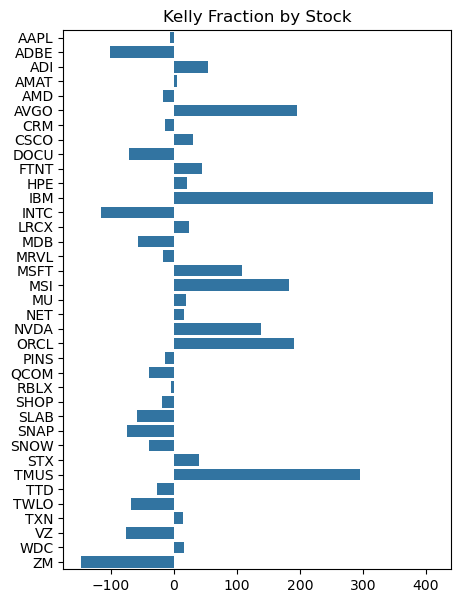

In [6]:
plt.figure(figsize=(5,7))
sns.barplot(y=stock_columns,x=kellys,orient='h')
plt.title('Kelly Fraction by Stock')
average_kelly = np.round(np.mean(kellys),2)
print(f"Average Kelly Fraction Across Stocks: {average_kelly}")
plt.show()